# referance https://www.researchgate.net/publication/222574859_Facial_expression_recognition_based_on_Local_Binary_Patterns_A_comprehensive_study/link/5f485162299bf13c504481fa/download

link : https://pyimagesearch.com/2015/12/07/local-binary-patterns-with-python-opencv/



# load data from drive fer2013 plus


## trational

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import SGD
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
#copy from  drive to runtime
!cp  /content/drive/MyDrive/GP/emotion_data/fer2013plus/fer2013new.csv  .
!cp  /content/drive/MyDrive/GP/emotion_data/fer2013/fer2013.csv .
#  0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral
# neutral, happiness, surprise, sadness, anger, disgust, fear, contempt

In [ ]:
emotion_data = pd.read_csv('/content/fer2013.csv')
emotion_data_new = pd.read_csv('/content/fer2013new.csv')
X_train = []
y_train = []
X_test = []
y_test = []
name_train=[]
name_test=[]
emotions=['neutral','happiness','surprise','sadness']#['neutral','happiness','surprise','sadness','anger','disgust','fear','contempt']

In [ ]:
for (index, row), (_, row_n) in zip(emotion_data.iterrows(),emotion_data_new.iterrows()):
    k = row['pixels'].split(" ")
    if row_n['Usage'] == 'Training':
      for j in range(len(emotions)):
        if(row_n[emotions[j]]>=7):
          X_train.append(np.array(k))
          name_train.append(row_n['Image name'])
          y_train.append(j)
    elif row_n['Usage'] == 'PublicTest':
         for j in range(len(emotions)):
          if(row_n[emotions[j]]==10):
            X_test.append(np.array(k))
            name_test.append(row_n['Image name'])
            y_test.append(j)

In [ ]:
len(y_train)

16677

## make test data as any of correct in it:

In [ ]:
X_train=[]
y_train=[]
X_test=[]
y_test=[]
for (index, row), (_, row_n) in zip(emotion_data.iterrows(),emotion_data_new.iterrows()):
    k = row['pixels'].split(" ")
    if row_n['Usage'] == 'Training':
      for j in range(len(emotions)):
        if(row_n[emotions[j]]>=5):
          X_train.append(np.array(k))
          y_train.append(j)
    elif row_n['Usage'] == 'PublicTest':
         X_test.append(np.array(k))
         y_emotions=[]
         for j in range(len(emotions)):
          if(row_n[emotions[j]]!=0):
            y_emotions.append(j)
         y_test.append(y_emotions)

In [ ]:
X_test=[]
y_test=[]
for (index, row), (_, row_n) in zip(emotion_data.iterrows(),emotion_data_new.iterrows()):
    k = row['pixels'].split(" ")
    # if row_n['Usage'] == 'Training':
    #   for j in range(len(emotions)):
    #     if(row_n[emotions[j]]>=5):
    #       X_train.append(np.array(k))
    #       y_train.append(j)
    if row_n['Usage'] == 'PublicTest':
         X_test.append(np.array(k))
         y_emotions=[]
         for j in range(len(emotions)):
            y_emotions.append((row_n[emotions[j]], j))
         y_emotions = [i for k,i in sorted(y_emotions, reverse=True)[:1]]
         y_test.append(y_emotions)

In [ ]:
y_test

## code shared

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
#################################################
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)
X_train=X_train.reshape((len(X_train),48,48))
X_test=X_test.reshape((len(X_test),48,48))
#################################################
X_test = X_test.astype(np.float)
#y_test = y_test.astype(np.integer)
X_train = X_train.astype(np.float)
y_train = y_train.astype(np.integer)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykern

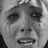

sadness


array([[ 20.,  17.,  19., ..., 187., 176., 162.],
       [ 22.,  17.,  17., ..., 195., 180., 171.],
       [ 17.,  17.,  18., ..., 203., 193., 175.],
       ...,
       [  1.,   1.,   1., ..., 106., 115., 119.],
       [  2.,   2.,   1., ..., 103., 111., 119.],
       [  2.,   2.,   2., ...,  99., 107., 118.]])

In [ ]:
cv2_imshow(X_train[y_train==3][2])
print(emotions[y_train[y_train==3][2]])
X_train[y_train==3][0]

In [ ]:
X_test.shape

(983, 48, 48)

# imports

In [ ]:
from skimage.feature import local_binary_pattern
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from sklearn.neural_network import MLPClassifier
import numpy as np
from skimage.feature import greycomatrix, greycoprops,hog
from scipy.signal import convolve2d
from skimage.transform import rotate
from skimage.feature import local_binary_pattern
np.random.seed(1337) # for reproducibility
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import cv2
from google.colab.patches import cv2_imshow
from tqdm.notebook import tqdm
import os
import copy
import gc
import pickle
from joblib import dump, load

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KernelDensity
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# feature

## Haralick from GLCM

In [ ]:
DISTANCES = [1, 3, 5]
ANGLES = [0, np.pi/4, np.pi/2, 3*np.pi/4]
    
def extract_features_Haralick(image):
    glcm = greycomatrix(image, 
                    distances=DISTANCES, 
                    angles=ANGLES,
                    symmetric=True,
                    normed=True)
    properties = ['contrast', 'energy', 'homogeneity', 'correlation']
    contrast = greycoprops(glcm, properties[0])
    energy = greycoprops(glcm, properties[1])
    homogeneity = greycoprops(glcm, properties[2])
    correlation = greycoprops(glcm, properties[3])
    Haralick=np.concatenate((contrast,energy,homogeneity,correlation),axis=None)
    Haralick=Haralick.flatten()
    return Haralick

### fixed bins number

In [ ]:
wieghts=[0,1,1,1,1,0
   ,2,2,2,2,2,2
   ,2,4,4,4,4,2
   ,1,1,2,2,1,1
   ,1,2,4,4,2,1
   ,0,1,2,2,1,0]
r=2
w=48
l=48
def getLBPH(image,region_len):
  LBP_image=local_binary_pattern(image, 8,2)
  LBP_image=LBP_image[r:l-r,r:w-r]
  LBP_image
  LBP_hist=[np.histogram(LBP_image[i*int((l-2*r)/region_len):(i+1)*int((l-2*r)/region_len),j*int((w-2*r)/region_len):(j+1)*int((w-2*r)/region_len)].ravel(),bins=64,range=(0,255))  
  for i in range(region_len)for j in range(region_len)]
  LBP_hist=np.array([item[0]/np.sum(item[0])*wieghts[i] if np.sum(item[0]) else item[0] for i, item in enumerate(LBP_hist)]).ravel()
  return LBP_hist

### variable bins number

In [ ]:
wieghts=[0,1,1,1,1,0
   ,2,2,2,2,2,2
   ,2,4,4,4,4,2
   ,1,1,2,2,1,1
   ,1,2,4,4,2,1
   ,0,1,2,2,1,0]
bin=[1,64,64,0,64]
r=2
w=48
l=48
def getLBPH(image,region_len):
  LBP_image=local_binary_pattern(image, 8,2)
  LBP_image=LBP_image[r:l-r,r:w-r]
  #print(LBP_image.shape)
  LBP_hist=[np.histogram(LBP_image[i*int((l-2*r)/region_len):(i+1)*int((l-2*r)/region_len),j*int((w-2*r)/region_len):(j+1)*int((w-2*r)/region_len)].ravel(),bins=bin[wieghts[i*region_len+j]],range=(0,255))  
  for i in range(region_len)for j in range(region_len)]
  LBP_hist=np.concatenate(np.array([item[0]/np.sum(item[0])*wieghts[i] if np.sum(item[0]) else item[0] for i, item in enumerate(LBP_hist)]))
  return LBP_hist

In [ ]:
4/2*7

14.0

In [ ]:
import numpy as np 

print(np.histogram([10,20,31,41,71,81,91,99,41,99,200,207,250],bins=13,range=(0,255)))
hist=[0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in [10,20,31,41,71,81,91,99,41,99,200,207,250]:
  hist[int(13*i/255)]+=1
hist


(array([1, 2, 2, 1, 2, 2, 0, 0, 0, 0, 2, 0, 1]), array([  0.        ,  19.61538462,  39.23076923,  58.84615385,
        78.46153846,  98.07692308, 117.69230769, 137.30769231,
       156.92307692, 176.53846154, 196.15384615, 215.76923077,
       235.38461538, 255.        ]))


[1, 2, 2, 1, 2, 2, 0, 0, 0, 0, 2, 0, 1]

## extract local binary pattern feature


## feature extraction in training


In [ ]:
getLBPH(X_train[0],6).shape

NameError: ignored

In [ ]:
training_features=[getLBPH(img,6) for img in X_train]
training_features=np.array(training_features)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


## feature extraction in test 

In [ ]:
testing_features=[getLBPH(img,6) for img in X_test]
testing_features=np.array(testing_features)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


## for Haralick

### train data

In [ ]:
training_features =[extract_features_Haralick(np.array(x,dtype=np.uint8))  for x in X_train]
training_features=np.array(training_features)
training_features = training_features.reshape((training_features.shape[0], -1))

### test data

In [ ]:
testing_features =[extract_features_Haralick(np.array(x,dtype=np.uint8))  for x in X_train]
testing_features=np.array(testing_features)
testing_features = testing_features.reshape((testing_features.shape[0], -1))

# models

## shared

In [ ]:
# imports

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KernelDensity
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
# del X_train
# del X_test
# import gc
 
# # Returns the number of
# # objects it has collected
# # and deallocated
# collected = gc.collect()

In [ ]:
def classifier_train(class_obj):
  global training_features
  clf = make_pipeline(StandardScaler(), class_obj)
  clf.fit(training_features, y_train)
  print("trainning ",clf.score(training_features, y_train))
  import gc
  # Returns the number of
  # objects it has collected
  # and deallocated
  collected = gc.collect()
  y_pred = clf.predict(testing_features)
  report = classification_report(y_test, y_pred)
  conf_matrix = confusion_matrix(y_test, y_pred)
  acc = accuracy_score(y_test, y_pred)
  print("*"*10, "Accuarcy = ", acc, "*"*10)
  print("*"*30)
  print(report)
  print("*"*30)
  print(conf_matrix)
  print("*"*30)
  return clf, acc, report, conf_matrix 

## NN

In [ ]:
clf, acc, report, conf_matrix = classifier_train(MLPClassifier(alpha=1e-04, hidden_layer_sizes=(16,16), random_state=1,solver='lbfgs'))

## kNN

In [ ]:
KNN_clf, KNN_acc,  KNN_report,  KNN_conf_matrix = classifier_train(KNeighborsClassifier(n_neighbors=1))

In [ ]:
from joblib import dump, load
clf=load("/content/svm_acc_LBPH_C3_normalize_each_H_SVM_withCropping_bins59_dataMoreThan7_rbf.joblib")


## try test of other data set




## Enter features to SVM Model

### train model

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# 4 samples/observations and 2 variables/features
data = np.array([[0, 0,6], [1, 0,5], [0, 1,4], [1, 1,5]])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(training_features)
print(scaler.mean_)
original_means = np.mean(training_features,axis=0)
original_stds = np.std(training_features,axis=0) # need to get value and check correct , and send this values to java to check 
original_means,original_stds # need to get value and check correct , and send this values to java to check 

[0.         0.07820988 0.0308882  ... 0.02163189 0.09059526 0.        ]


(array([0.        , 0.07820988, 0.0308882 , ..., 0.02163189, 0.09059526,
        0.        ]),
 array([0.        , 0.06958934, 0.04834182, ..., 0.03413272, 0.07090892,
        0.        ]))

In [ ]:
scaler.scale_ = np.array([0.5       , 0.5       , 0.70710678])


In [ ]:
scaler.transform(testing_features)

array([[5.        , 9.        , 1.41421356]])

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# 4 samples/observations and 2 variables/features
data = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(training_features)
print(scaler.mean_)
original_means = np.mean(training_features,axis=0)
original_stds = np.std(training_features,axis=0) # need to get value and check correct , and send this values to java to check 
original_means,original_stds # need to get value and check correct , and send this values to java to check 

[0.         0.07820988 0.0308882  ... 0.02163189 0.09059526 0.        ]


(array([0.        , 0.07820988, 0.0308882 , ..., 0.02163189, 0.09059526,
        0.        ]),
 array([0.        , 0.06958934, 0.04834182, ..., 0.03413272, 0.07090892,
        0.        ]))

In [ ]:
file1 = open('myfile.txt', 'w')
for i in original_means :
  file1.write(str(i)+" ")
file1.write(" \n  \n ")  
for i in original_stds :
  file1.write(str(i)+" ")
file1.close()

In [ ]:
original_means

array([0.        , 0.07820988, 0.0308882 , ..., 0.02163189, 0.09059526,
       0.        ])

In [ ]:
#print(scaler.transform([testing_features[0]]))

x=original_stds
x[original_stds !=0]=(testing_features[0]-original_means)[original_stds !=0]/original_stds[original_stds !=0]
x==scaler.transform([testing_features[0]])

array([[ True, False, False, ..., False, False,  True]])

In [ ]:
svm = cv2.ml.SVM_create()
svm.setType(cv2.ml.SVM_C_SVC)
svm.setKernel(cv2.ml.SVM_RBF)
svm.setTermCriteria((cv2.TERM_CRITERIA_EPS, 1000000000, 0.001))
svm.setC(3)
svm.setDegree(3)
svm.setGamma(0.00048828124999999946)

svm.train(training_features.astype(np.float32), cv2.ml.ROW_SAMPLE, y_train.astype(np.int32))
#svm.save("/content/drive/MyDrive/GP/emotion_data/opencv_notstandard_firstT_correct.xml")

True

In [ ]:
svm=cv2.load_SVM("/content/drive/MyDrive/GP/emotion_data/opencv_withOutstandard_ThirdT_SetC_D_correctGa.xml")

AttributeError: ignored

In [ ]:
!cp /content/drive/MyDrive/GP/emotion_data/opencv_withstandard_ThirdT_SetC_D_Ga.xml .

In [ ]:
!ls -lh

total 832M
drwx------ 5 root root 4.0K Jul 11 15:37 drive
-rw------- 1 root root 288M Jul 11 14:51 fer2013.csv
-rw------- 1 root root 1.6M Jul 11 14:51 fer2013new.csv
-rw------- 1 root root 543M Jul 11 17:55 opencv_withstandard_ThirdT_SetC_D_Ga.xml
drwxr-xr-x 1 root root 4.0K Jul  6 13:22 sample_data


In [ ]:
scale_test=scaler.transform(testing_features)
scale_test.shape,scaled_data.shape,testing_features.shape,training_features.shape

((983, 2052), (16677, 2052), (983, 2052), (16677, 2052))

In [ ]:
ypred.reshape((3,)).shape

(3,)

In [ ]:
np.unique(y_pred)

array([0, 1, 2, 3])

In [ ]:
svm=cv2.ml.SVM_load("/content/drive/MyDrive/GP/emotion_data/opencv_withstandard_ThirdT_SetC_D_correctGa.xml")
_, y_pred = svm.predict(scale_test.astype(np.float32)[0])
y_pred = y_pred.reshape((len(testing_features),)).astype(np.int)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print("*"*10, "Accuarcy = ", acc, "*"*10)
print("*"*30)
print(report)
print("*"*30)
print(conf_matrix)
print("*"*30)


error: ignored

In [ ]:
#['neutral','happiness','surprise','sadness','anger','disgust','fear','contempt']
clf, acc, report, conf_matrix = classifier_train(SVC(kernel='rbf', C=3, probability=True))

trainning  1.0
********** Accuarcy =  0.8789420142421159 **********
******************************
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       265
           1       0.92      0.92      0.92       578
           2       0.93      0.85      0.89        78
           3       0.88      0.56      0.69        62

    accuracy                           0.88       983
   macro avg       0.88      0.80      0.83       983
weighted avg       0.88      0.88      0.88       983

******************************
[[229  32   4   0]
 [ 40 534   0   4]
 [  8   3  66   1]
 [ 16  10   1  35]]
******************************


In [ ]:
from joblib import dump, load
dump(clf, 'svm_acc_C3_LBPH_Bins_64_SVM_dataMoreThan7_rbf_weights_0_1_2_4_emotions_4_happay_sad_natural_surprised.joblib') 
!cp 'svm_acc_C3_LBPH_Bins_1_16_64_64_SVM_dataMoreThan7_rbf_weights_0_1_2_4.joblib' "/content/drive/MyDrive/GP"

In [ ]:
!cp 'svm_acc_C3_LBPH_Bins_1_16_64_64_SVM_bins59_dataMoreThan7_rbf_weights_0_1_2_4.joblib' "/content/drive/MyDrive/GP"

##tries

In [ ]:
from joblib import dump, load
!cp  "/content/drive/MyDrive/GP/Copy of svm_acc_C3_LBPH_Bins_64_SVM_bins59_dataMoreThan7_rbf_weights_0_1_2_4_emotions_4_happay_sad_natural_surprised.joblib"  .
clf=load("/content/Copy of svm_acc_C3_LBPH_Bins_64_SVM_bins59_dataMoreThan7_rbf_weights_0_1_2_4_emotions_4_happay_sad_natural_surprised.joblib")

In [ ]:
clf["svc"].support_vectors_.shape

(13398, 2304)

In [ ]:
from bs4 import BeautifulSoup
with open("/content/drive/MyDrive/GP/emotion_data/opencv_withstandard_ThirdT_SetC_D_correctGa.xml") as f:
  data = f.read()


In [ ]:
bs_data = BeautifulSoup(data, "xml")

In [ ]:
bs_data

In [ ]:
bs_data.find("sv_count")

<sv_count>7957</sv_count>

In [ ]:
clf["svc"]._gamma

0.00048828124999999946

In [ ]:

from joblib import dump, load
!cp  "/content/drive/MyDrive/svm_acc_LBPH_C3_normalize_each_H_SVM_withCropping_bins59_dataMoreThan7_rbf_CK+48.joblib"  .
clf=load("/content/svm_acc_LBPH_C3_normalize_each_H_SVM_withCropping_bins59_dataMoreThan7_rbf_CK+48.joblib")

In [ ]:
y_pred = clf.predict(testing_features)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print("*"*10, "Accuarcy = ", acc, "*"*10)
print("*"*30)
print(report)
print("*"*30)
print(conf_matrix)
print("*"*30)


********** Accuarcy =  0.8476095617529881 **********
******************************
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       265
           1       0.90      0.90      0.90       578
           2       0.91      0.86      0.88        78
           3       0.75      0.53      0.62        62
           4       0.67      0.40      0.50        20
           6       1.00      1.00      1.00         1

    accuracy                           0.85      1004
   macro avg       0.83      0.75      0.78      1004
weighted avg       0.85      0.85      0.85      1004

******************************
[[220  37   4   4   0   0]
 [ 47 522   1   5   3   0]
 [  5   6  67   0   0   0]
 [ 17  10   1  33   1   0]
 [  6   3   1   2   8   0]
 [  0   0   0   0   0   1]]
******************************


In [ ]:
y_pred[9] in y_test[9]

True

In [ ]:
acc=0
for i in range(len(y_pred)):
  if(y_pred[i] in y_test[i]):
    acc+=1
acc/len(y_pred)

#len(X_test),len(y_test)

TypeError: ignored

In [ ]:
from joblib import dump, load
!cp  "/content/drive/MyDrive/svm_acc_LBPH_C3_normalize_each_H_SVM_withCropping_bins59_datalargerequal8_rbf.joblib"  .
clf=load("/content/svm_acc_LBPH_C3_normalize_each_H_SVM_withCropping_bins59_datalargerequal8_rbf.joblib")

In [ ]:
y_pred = clf.predict(testing_features)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print("*"*10, "Accuarcy = ", acc, "*"*10)
print("*"*30)
print(report)
print("*"*30)
print(conf_matrix)
print("*"*30)

NameError: ignored

In [ ]:
from joblib import dump, load
!cp  "/content/drive/MyDrive/svm_acc_LBPH_C3_normalize_each_H_SVM_withCropping_bins59_dataMoreThan5.joblib"  .
clf=load("/content/svm_acc_LBPH_C3_normalize_each_H_SVM_withCropping_bins59_dataMoreThan5.joblib")

In [ ]:
y_pred = clf.predict(testing_features)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print("*"*10, "Accuarcy = ", acc, "*"*10)
print("*"*30)
print(report)
print("*"*30)
print(conf_matrix)
print("*"*30)

********** Accuarcy =  0.8396414342629482 **********
******************************
              precision    recall  f1-score   support

           0       0.72      0.86      0.79       265
           1       0.91      0.88      0.89       578
           2       0.89      0.86      0.88        78
           3       0.70      0.53      0.61        62
           4       0.80      0.40      0.53        20
           6       1.00      1.00      1.00         1

    accuracy                           0.84      1004
   macro avg       0.84      0.75      0.78      1004
weighted avg       0.84      0.84      0.84      1004

******************************
[[228  29   4   4   0   0]
 [ 59 506   2   9   2   0]
 [  6   4  67   1   0   0]
 [ 16  12   1  33   0   0]
 [  6   5   1   0   8   0]
 [  0   0   0   0   0   1]]
******************************


# Tries

In [ ]:
from joblib import dump, load
!cp  "/content/drive/MyDrive/GP/emotion_data/fer2013plus/best_18-5_svm_acc_71%_test_LBPH_C10_normalize_each_H_SVM_withCropping.joblib"  .
clf=load("/content/best_18-5_svm_acc_71%_test_LBPH_C10_normalize_each_H_SVM_withCropping.joblib")

# y_pred = clf.predict(training_features)
report = classification_report(y_train, y_pred)
conf_matrix = confusion_matrix(y_train, y_pred)
acc = accuracy_score(y_train, y_pred)
print("*"*10, "Accuarcy = ", acc, "*"*10)
print("*"*30)
print(report)
print("*"*30)
print(conf_matrix)
print("*"*30)

In [ ]:
np.where(y_pred!=y_train)

In [ ]:
cv2_imshow(X_train[22785])
y_train[22785],y_pred[22785],name_train[22785],emotion_data_new.iloc[22758]

In [ ]:
cv2_imshow(X_train[21253])
y_train[21253],y_pred[21253]

# traing images from my gallery

In [ ]:
from PIL import Image
size = (48,48)
im = Image.open("/content/eeeyeyeey.PNG")
im_resized = im.resize(size, Image.ANTIALIAS)
im_resized.save("my_image_resized.png", "PNG")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  after removing the cwd from sys.path.


(48, 48)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


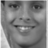

'happiness'

In [ ]:
from skimage import color
from skimage import io

img = color.rgb2gray(io.imread('/content/my_image_resized.png'))*255

print(img.shape)
svm=cv2.ml.SVM_load("/content/drive/MyDrive/GP/emotion_data/opencv_withstandard_ThirdT_SetC_D_correctGa.xml")

_, y_pred = svm.predict(scaler.transform(np.array([getLBPH(img,6)])).astype(np.float32))
cv2_imshow(img)
emotions[int(y_pred[0][0])]

In [ ]:
y_pred = clf.predict(testing_features)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print("*"*10, "Accuarcy = ", acc, "*"*10)
print("*"*30)
print(report)
print("*"*30)
print(conf_matrix)
print("*"*30)

# tryings

In [ ]:
l=48
w=48
r=2
LBPH = cv2.face.LBPHFaceRecognizer_create(2,8,8,8) #Initialize LBPH face classifier
print( "training LBPH face classifier")
print ("size of training set is:", len(y_train), "images")

LBPH.train(X_train[0:100], np.asarray(y_train)[0:100])
print ("predicting classification set")
cnt = 0
correct = 0
incorrect = 0

In [ ]:
LBPH.getHistograms()[0][0]*== training_features[0]

In [ ]:
cnt = 0
correct = 0
incorrect = 0
for image in X_test:
    pred, conf = LBPH.predict(image)
    if np.any(np.array(y_test[cnt])==pred):
        correct += 1
        cnt += 1
    else:
        incorrect += 1
        cnt += 1
print(correct,incorrect,((100*correct)/(correct + incorrect)))

In [ ]:
LBP_image=local_binary_pattern(X_train[11], 8,2)
LBP_image=LBP_image[r:l-r,r:w-r]
LBP_image
LBP_hist=[np.histogram(LBP_image[i*int((l-2*r)/8):(i+1)*int((l-2*r)/8),j*int((w-2*r)/8):(j+1)*int((w-2*r)/8)].ravel(),bins=256,range=(0,255))  
for i in range(8)for j in range(8)]
LBP_hist=np.array([item[0]/np.sum(item[0]) if np.sum(item[0]) else item[0] for i, item in enumerate(LBP_hist)]).ravel()
 

In [ ]:
training_features

In [ ]:
LBP_hist[256:256*2]

In [ ]:
np.array(training_features*1000,dtype=int)[0:14]==np.array(LBPH.getHistograms()*1000,dtype=int)[0:14]

In [ ]:
training_features[11],LBPH.getHistograms()[11][0]

In [ ]:
LBP_hist=np.histogram(LBP_image.ravel(),bins=256) 
#LBP_hist=np.array([item[0] for item in LBP_hist]).ravel()
LBP_hist=LBP_hist[0]/np.sum(LBP_hist[0])
np.sum(LBP_hist[0])
np.sum(LBP_hist[0]/np.sum(LBP_hist[0])),np.sum(LBPH.getHistograms()[0])
LBPH.getHistograms()[0][0],LBP_hist

In [ ]:
LBP_hist[0]


In [ ]:
LBPH.getHistograms()[0][0][0:256]

In [ ]:
LBPH.